In [32]:
import numpy as np
import pandas as pd #gestion des données 
import sklearn.linear_model as sklin  #apprentissage 

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
%pylab inline

COLOR = 'black'
matplotlib.rcParams['text.color'] = COLOR
matplotlib.rcParams['axes.labelcolor'] = COLOR
matplotlib.rcParams['xtick.color'] = COLOR
matplotlib.rcParams['ytick.color'] = COLOR

Populating the interactive namespace from numpy and matplotlib


In [3]:
import warnings #Ne pas importer dans vos fichiers
warnings.filterwarnings('ignore')

In [7]:
#Partie 1: prise en main des données

hitters=pd.read_csv("Hitters.csv",index_col="Name")
hitters

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
Name,,,,,,,,,,,,,,,,,,,,
-Andy Allanson,293,66,1,30,29,14,1,293,66,1,30,29,14,A,E,446,33,20,NaN,A
-Alan Ashby,315,81,7,24,38,39,14,3449,835,69,321,414,375,N,W,632,43,10,475.000,N
-Alvin Davis,479,130,18,66,72,76,3,1624,457,63,224,266,263,A,W,880,82,14,480.000,A
-Andre Dawson,496,141,20,65,78,37,11,5628,1575,225,828,838,354,N,E,200,11,3,500.000,N
-Andres Galarraga,321,87,10,39,42,30,2,396,101,12,48,46,33,N,E,805,40,4,91.500,N
-Alfredo Griffin,594,169,4,74,51,35,11,4408,1133,19,501,336,194,A,W,282,421,25,750.000,A
-Al Newman,185,37,1,23,8,21,2,214,42,1,30,9,24,N,E,76,127,7,70.000,A
-Argenis Salazar,298,73,0,24,24,7,3,509,108,0,41,37,12,A,W,121,283,9,100.000,A
-Andres Thomas,323,81,6,26,32,8,2,341,86,6,32,34,8,N,W,143,290,19,75.000,N


In [9]:
print(hitters.shape)

(322, 20)


In [10]:
print(hitters.dtypes)

AtBat          int64
Hits           int64
HmRun          int64
Runs           int64
RBI            int64
Walks          int64
Years          int64
CAtBat         int64
CHits          int64
CHmRun         int64
CRuns          int64
CRBI           int64
CWalks         int64
League        object
Division      object
PutOuts        int64
Assists        int64
Errors         int64
Salary       float64
NewLeague     object
dtype: object


In [11]:
print(hitters.isnull().sum()) #permet de compter le nombre de données manquantes

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64


In [15]:
mval_idx = hitters.isnull().sum(axis=1)
df_mval = hitters.loc[mval_idx!=0]
df = hitters.loc[mval_idx==0]

In [18]:
#mieux 
# df = hitters.dropna()

In [17]:
X = df.loc[:,df.dtypes=='int64'] #on sélectionne les colonnes dont le type est entier 
X = X - X.mean()
Y = df.Salary
print(X)

                        AtBat        Hits      HmRun       Runs        RBI  \
Name                                                                         
-Alan Ashby        -88.642586  -26.828897  -4.619772 -30.745247 -13.486692   
-Alvin Davis        75.357414   22.171103   6.380228  11.254753  20.513308   
-Andre Dawson       92.357414   33.171103   8.380228  10.254753  26.513308   
-Andres Galarraga  -82.642586  -20.828897  -1.619772 -15.745247  -9.486692   
-Alfredo Griffin   190.357414   61.171103  -7.619772  19.254753  -0.486692   
-Al Newman        -218.642586  -70.828897 -10.619772 -31.745247 -43.486692   
-Argenis Salazar  -105.642586  -34.828897 -11.619772 -30.745247 -27.486692   
-Andres Thomas     -80.642586  -26.828897  -5.619772 -28.745247 -19.486692   
-Andre Thornton     -2.642586  -15.828897   5.380228  -5.745247  14.513308   
-Alan Trammell     170.357414   51.171103   9.380228  52.254753  23.513308   
-Alex Trevino     -201.642586  -54.828897  -7.619772 -23.745247 

In [22]:
ridge = sklin.Ridge()
ridge.fit(X,Y)
ridge.coef_

array([-2.20287932,  7.82697068,  2.16196029, -2.09868663, -0.02245984,
        6.15062897, -2.5880828 , -0.1763119 ,  0.06991913, -0.23282742,
        1.60993326,  0.80133141, -0.79388497,  0.29457527,  0.38398464,
       -2.87825534])

In [23]:
lasso = sklin.Lasso()
lasso.fit(X,Y)
lasso.coef_

array([-2.16482646,  7.63712464,  1.89407188, -1.91767075,  0.03830205,
        6.06939193, -1.60304168, -0.19483094,  0.16016231, -0.09294004,
        1.55251191,  0.74921021, -0.77052554,  0.29422566,  0.38804059,
       -2.87582655])

In [24]:
alphas = np.logspace(-3,8,100)
print(alphas)

[1.00000000e-03 1.29154967e-03 1.66810054e-03 2.15443469e-03
 2.78255940e-03 3.59381366e-03 4.64158883e-03 5.99484250e-03
 7.74263683e-03 1.00000000e-02 1.29154967e-02 1.66810054e-02
 2.15443469e-02 2.78255940e-02 3.59381366e-02 4.64158883e-02
 5.99484250e-02 7.74263683e-02 1.00000000e-01 1.29154967e-01
 1.66810054e-01 2.15443469e-01 2.78255940e-01 3.59381366e-01
 4.64158883e-01 5.99484250e-01 7.74263683e-01 1.00000000e+00
 1.29154967e+00 1.66810054e+00 2.15443469e+00 2.78255940e+00
 3.59381366e+00 4.64158883e+00 5.99484250e+00 7.74263683e+00
 1.00000000e+01 1.29154967e+01 1.66810054e+01 2.15443469e+01
 2.78255940e+01 3.59381366e+01 4.64158883e+01 5.99484250e+01
 7.74263683e+01 1.00000000e+02 1.29154967e+02 1.66810054e+02
 2.15443469e+02 2.78255940e+02 3.59381366e+02 4.64158883e+02
 5.99484250e+02 7.74263683e+02 1.00000000e+03 1.29154967e+03
 1.66810054e+03 2.15443469e+03 2.78255940e+03 3.59381366e+03
 4.64158883e+03 5.99484250e+03 7.74263683e+03 1.00000000e+04
 1.29154967e+04 1.668100

Text(0.5, 1.0, 'Ridge coefficients as a function of alpha')

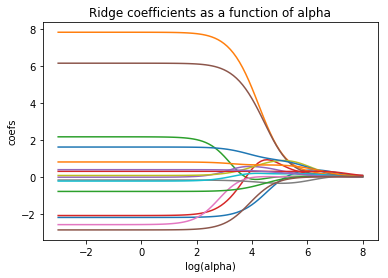

In [29]:
coefs = []
for alpha in alphas:
    ridge.set_params(alpha=alpha)
    ridge.fit(X,Y)
    coefs.append(ridge.coef_)
coefs = np.array(coefs)

fig,ax = plt.subplots()
ax.plot(np.log(alphas)/np.log(10),coefs)

ax.set_xlabel('log(alpha)')
ax.set_ylabel('coefs')
ax.set_title('Ridge coefficients as a function of alpha')

In [30]:
# pour les petites valeurs de alpha, on se rapproche de l'estimateur des MC

array([[-2.20302178e+00,  7.82776076e+00,  2.16354441e+00, ...,
         2.94573438e-01,  3.83995292e-01, -2.87871383e+00],
       [-2.20302174e+00,  7.82776053e+00,  2.16354395e+00, ...,
         2.94573438e-01,  3.83995289e-01, -2.87871370e+00],
       [-2.20302169e+00,  7.82776023e+00,  2.16354335e+00, ...,
         2.94573439e-01,  3.83995285e-01, -2.87871353e+00],
       ...,
       [ 6.96090123e-02,  2.53291949e-02,  3.36470521e-03, ...,
         1.07906481e-01,  7.53524668e-03,  2.31094252e-04],
       [ 5.61705794e-02,  2.02938777e-02,  2.70870479e-03, ...,
         8.94039526e-02,  6.02998041e-03,  2.00520561e-04],
       [ 4.50592934e-02,  1.61836138e-02,  2.17002310e-03, ...,
         7.31962430e-02,  4.78832930e-03,  1.68149930e-04]])

Text(0.5, 1.0, 'Lasso coefficients as a function of alpha')

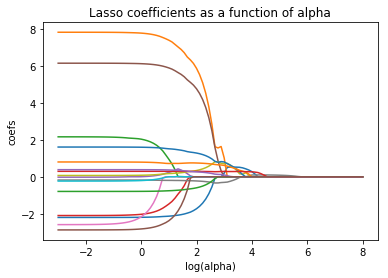

In [42]:

_,coefs,_ = sklin.lasso_path(X, Y, alphas=alphas)
coefs = coefs.T[::-1]

fig,ax = plt.subplots()
ax.plot(np.log(alphas)/np.log(10),coefs)
ax.set_xlabel('log(alpha)')
ax.set_ylabel('coefs')
ax.set_title('Lasso coefficients as a function of alpha')


Text(0.5, 1.0, 'Number of non zero coeff as a function of alpha')

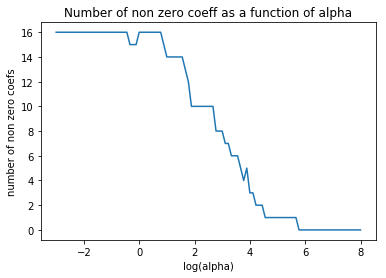

In [43]:
nz_coefs = (coefs!=0).sum(axis=1) #sommer les coeff nuls

fig,ax=plt.subplots()
ax.plot(np.log(alphas)/np.log(10),nz_coefs)
ax.set_xlabel('log(alpha)')
ax.set_ylabel('number of non zero coefs')
ax.set_title('Number of non zero coeff as a function of alpha')

In [48]:
ridgeCV = sklin.RidgeCV(alphas=alphas,store_cv_values=True) #conserver les valeurs
ridgeCV.fit(X,Y)
mse_ridgeCV = ridgeCV.cv_values_.mean(axis = 0)

Text(0.5, 1.0, 'MSE for RidgeCV as a function of alpha')

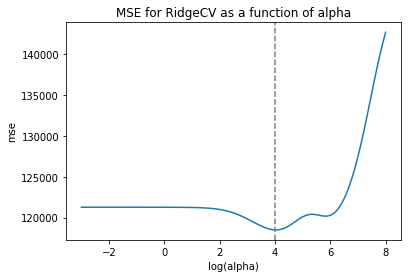

In [50]:
fig,ax=plt.subplots()
ax.plot(np.log(alphas)/np.log(10),mse_ridgeCV)
ax.axvline((np.log(alphas)/np.log(10))[np.argmin(mse_ridgeCV)],ls='--',c='grey')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('mse')
ax.set_title('MSE for RidgeCV as a function of alpha')

In [52]:
print(ridgeCV.alpha_)
print(ridgeCV.coef_)

10000.0
[-1.51691762  4.8192637  -0.12739694  0.40712282  0.5577397   4.24015443
 -0.04260603 -0.26399837  0.52396809  0.17705111  1.19057093  0.64762287
 -0.5375318   0.29399258  0.32789725 -1.308078  ]


In [54]:
lassoCV = sklin.LassoCV(alphas=alphas,cv=len(Y))
lassoCV.fit(X,Y)
mse_lassoCV = lassoCV.mse_path_.mean(axis=1)[::-1] #on retourne le tableau pour avoir un ordre croissant d'alpha

Text(0.5, 1.0, 'MSE for LassoCV as a function of alpha')

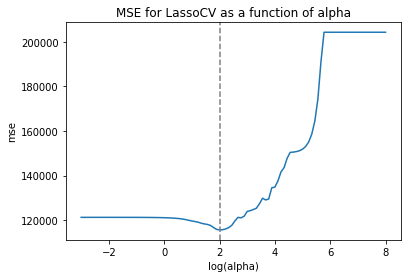

In [55]:
fig,ax=plt.subplots()
ax.plot(np.log(alphas)/np.log(10),mse_lassoCV)
ax.axvline((np.log(alphas)/np.log(10))[np.argmin(mse_lassoCV)],ls='--',c='grey')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('mse')
ax.set_title('MSE for LassoCV as a function of alpha')

In [56]:
print(lassoCV.alpha_)
print(lassoCV.coef_)

100.0
[-1.73102746  5.87422932  0.         -0.          0.          4.76607398
 -0.         -0.22686856  0.33793296  0.          1.28494767  0.74558358
 -0.59798747  0.29038641  0.26546646 -0.        ]


In [59]:
sigma2 = Y.var()
n = len(Y)
BIC = []
for alpha in alphas:
    lasso.set_params(alpha=alpha)
    lasso.fit(X,Y)
    hatY = lasso.predict(X)
    d = (lasso.coef_!=0).sum()
    BIC.append(((Y-hatY)**2).sum()+d*sigma2*np.log(n))

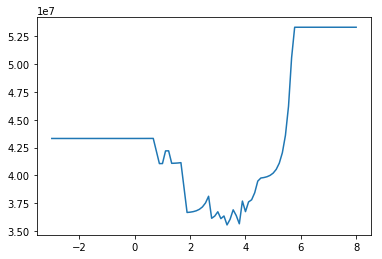

In [60]:
fig,ax=plt.subplots()
ax.plot(np.log(alphas)/np.log(10),BIC)